In [1]:
!pip install torch
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from transformers import TFBertModel, BertTokenizer, AutoTokenizer, TFAutoModel
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer, AutoTokenizer, TFAutoModel
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [4]:
code = pd.read_excel(r"/content/totalmerged.xlsx")
code

,Question,Correct_Code,Code_with_Error,Total_Marks
0,Print the factors of a number,#include <stdio.h>\nvoid printFactors(int numb...,#include <stdio.h>\nvoid printFactors(int numb...,7.0
1,Print the factors of a number,#include <stdio.h>\nvoid printFactors(int numb...,#include <stdio.h>\nvoid printFactors(int numb...,8.0
2,Print the factors of a number,#include <stdio.h>\nvoid printFactors(int numb...,#include <stdio.h>\nvoid printFactors(int numb...,5.0
3,Print the factors of a number,#include <stdio.h>\nvoid printFactors(int numb...,#include <stdio.h>\n\nvoid printFactors(int nu...,7.0
4,Print the factors of a number,#include <stdio.h>\nvoid printFactors(int numb...,#include <stdio.h>\n\nvoid printFactors(int nu...,5.0
...,...,...,...,...
995,Print maximum Occurring Character in a String ...,#include <stdio.h>\n\n#define ASCII_SIZE 128\n...,#include <stdio.h> \n\n#define MAX_SIZE 100 \n...,7.0
996,Print maximum Occurring Character in a String ...,#include <stdio.h>\n\n#define ASCII_SIZE 128\n...,#include <stdio.h> \n\nchar getMaxOccurringCha...,6.0
997,Print maximum Occurring Character in a String ...,#include <stdio.h>\n\n#define ASCII_SIZE 128\n...,#include <stdio.h> \n\nchar getMaxOccurringCha...,6.0
998,Print maximum Occurring Character in a String ...,#include <stdio.h>\n\n#define ASCII_SIZE 128\n...,#include <stdio.h> \n\n#define ASCII_SIZE 128 ...,5.0


In [5]:
# Merge columns
code['merged'] = code['Question'] +code['Code_with_Error']
code

,Question,Correct_Code,Code_with_Error,Total_Marks,merged
0,Print the factors of a number,#include <stdio.h>\nvoid printFactors(int numb...,#include <stdio.h>\nvoid printFactors(int numb...,7.0,Print the factors of a number#include <stdio.h...
1,Print the factors of a number,#include <stdio.h>\nvoid printFactors(int numb...,#include <stdio.h>\nvoid printFactors(int numb...,8.0,Print the factors of a number#include <stdio.h...
2,Print the factors of a number,#include <stdio.h>\nvoid printFactors(int numb...,#include <stdio.h>\nvoid printFactors(int numb...,5.0,Print the factors of a number#include <stdio.h...
3,Print the factors of a number,#include <stdio.h>\nvoid printFactors(int numb...,#include <stdio.h>\n\nvoid printFactors(int nu...,7.0,Print the factors of a number#include <stdio.h...
4,Print the factors of a number,#include <stdio.h>\nvoid printFactors(int numb...,#include <stdio.h>\n\nvoid printFactors(int nu...,5.0,Print the factors of a number#include <stdio.h...
...,...,...,...,...,...
995,Print maximum Occurring Character in a String ...,#include <stdio.h>\n\n#define ASCII_SIZE 128\n...,#include <stdio.h> \n\n#define MAX_SIZE 100 \n...,7.0,Print maximum Occurring Character in a String ...
996,Print maximum Occurring Character in a String ...,#include <stdio.h>\n\n#define ASCII_SIZE 128\n...,#include <stdio.h> \n\nchar getMaxOccurringCha...,6.0,Print maximum Occurring Character in a String ...
997,Print maximum Occurring Character in a String ...,#include <stdio.h>\n\n#define ASCII_SIZE 128\n...,#include <stdio.h> \n\nchar getMaxOccurringCha...,6.0,Print maximum Occurring Character in a String ...
998,Print maximum Occurring Character in a String ...,#include <stdio.h>\n\n#define ASCII_SIZE 128\n...,#include <stdio.h> \n\n#define ASCII_SIZE 128 ...,5.0,Print maximum Occurring Character in a String ...


In [6]:
# Fill missing values with empty strings
code['merged'] = code['merged'].fillna('')

In [7]:
# Load the codeBert tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
codeBERT_model  = TFAutoModel.from_pretrained("microsoft/codebert-base")

All model checkpoint layers were used when initializing TFRobertaModel.

All the layers of TFRobertaModel were initialized from the model checkpoint at microsoft/codebert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [8]:
X_text = code["merged"].values
y = code["Total_Marks"].values

In [9]:
# Tokenize and convert the textual data to vectors
X_vectors = []
for text in X_text:
    inputs = tokenizer.encode_plus(text, add_special_tokens=True, return_tensors='tf', max_length=512, truncation=True)
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']
    output = codeBERT_model(input_ids, attention_mask=attention_mask)[0][:, 0, :]
    X_vectors.append(output.numpy())

In [10]:
X_vectors = np.array(X_vectors)
y = np.array(y)

In [11]:
X_vectors

array([[[-1.2327175e-01, -2.6404507e-02, -1.9176882e-03, ...,
          2.1718159e-02, -6.7239243e-01,  5.8262670e-01]],

       [[-1.6138734e-01, -4.9201727e-02,  7.5989589e-03, ...,
          8.8904500e-03, -6.8235624e-01,  5.8136135e-01]],

       [[-1.1552152e-01, -2.3111146e-02,  2.5001429e-03, ...,
          3.3350289e-04, -6.5864515e-01,  5.7803500e-01]],

       ...,

       [[-7.0761919e-02, -1.5222792e-02, -4.3160323e-02, ...,
         -7.9720691e-02, -6.9509184e-01,  5.8536166e-01]],

       [[-6.5420836e-02, -7.0907317e-02, -6.4400889e-02, ...,
         -4.0937588e-02, -6.6287631e-01,  5.6271160e-01]],

       [[-9.0671562e-02, -8.3236501e-02, -6.4558029e-02, ...,
         -3.2379895e-02, -7.1274501e-01,  5.7850587e-01]]], dtype=float32)

In [12]:
# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [13]:
# Reshape the X_train and X_test arrays
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

**LSTM**

In [14]:
input_layer = Input(shape=(X_vectors.shape[1], X_vectors.shape[2]))
lstm_layer1 = LSTM(units=128, dropout=0.2, recurrent_dropout=0.2)(input_layer)
output_layer = Dense(units=1, activation='relu')(lstm_layer1)
model = Model(inputs=input_layer, outputs=output_layer)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 768)]          0         
                                                                 
 lstm (LSTM)                 (None, 128)               459264    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 459,393
Trainable params: 459,393
Non-trainable params: 0
_________________________________________________________________


In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape', 'mse'])

In [17]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[early_stopping])

Epoch 1/50
18/18 [==============================] - 6s 35ms/step - loss: 43.1851 - mae: 6.1922 - mape: 99.6441 - mse: 43.1851 - val_loss: 41.1968 - val_mae: 5.9415 - val_mape: 99.4681 - val_mse: 41.1968
Epoch 2/50
18/18 [==============================] - 0s 12ms/step - loss: 43.1851 - mae: 6.1922 - mape: 99.6441 - mse: 43.1851 - val_loss: 41.1968 - val_mae: 5.9415 - val_mape: 99.4681 - val_mse: 41.1968
Epoch 3/50
18/18 [==============================] - 0s 13ms/step - loss: 43.1851 - mae: 6.1922 - mape: 99.6441 - mse: 43.1851 - val_loss: 41.1968 - val_mae: 5.9415 - val_mape: 99.4681 - val_mse: 41.1968
Epoch 4/50
18/18 [==============================] - 0s 13ms/step - loss: 43.1851 - mae: 6.1922 - mape: 99.6441 - mse: 43.1851 - val_loss: 41.1968 - val_mae: 5.9415 - val_mape: 99.4681 - val_mse: 41.1968
Epoch 5/50
18/18 [==============================] - 0s 14ms/step - loss: 43.1851 - mae: 6.1922 - mape: 99.6441 - mse: 43.1851 - val_loss: 41.1968 - val_mae: 5.9415 - val_mape: 99.4681 - va

In [18]:
feature_model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
X_train_features = feature_model.predict(X_train)
X_test_features = feature_model.predict(X_test)

8/8 [==============================] - 0s 3ms/step


In [19]:
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

regressor_model=RidgeCV()


In [20]:
regressor_model.fit(X_train_features, y_train)

RidgeCV()

In [21]:
y_train_pred = regressor_model.predict(X_train_features)
y_test_pred = regressor_model.predict(X_test_features)


In [22]:
rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

<ipython-input-22-956a7a4506d6>:5: RuntimeWarning: divide by zero encountered in true_divide
  mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
<ipython-input-22-956a7a4506d6>:6: RuntimeWarning: divide by zero encountered in true_divide
  mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100


In [23]:
print("Train set results:")
print("RMSE: ", rmse_train)
print("MAE: ", mae_train)
print("MAPE: ", mape_train)
print("R2 score: ", r2_train)

print("Test set results:")
print("RMSE: ", rmse_test)
print("MAE: ", mae_test)
print("MAPE: ", mape_test)
print("R2 score: ", r2_test)

Train set results:
RMSE:  1.9193242554418672
MAE:  1.500166755412188
MAPE:  inf
R2 score:  0.23920913914141473
Test set results:
RMSE:  1.971249254997136
MAE:  1.543825633053303
MAPE:  inf
R2 score:  0.2674454998211392


Text(0.5, 1.0, 'Actual vs Predicted Values for marks (CodeBERT with LSTM and RidgeCV regressor)')

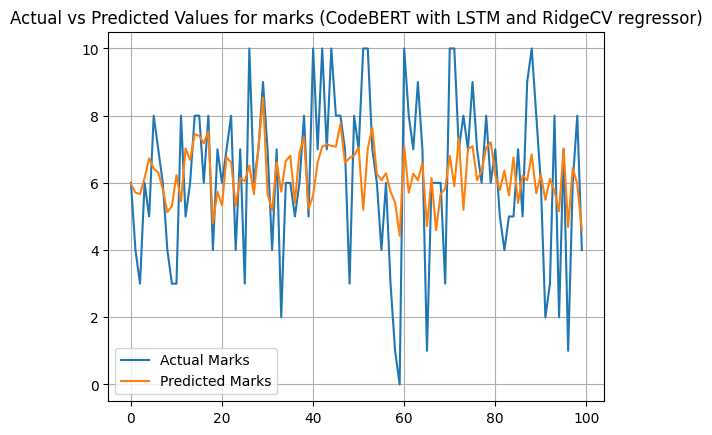

In [24]:
plt.plot(list(y_test[:100]), label="Actual Marks")
plt.plot(list(y_test_pred[:100]), label="Predicted Marks")
plt.xlabel = ('samples')
plt.ylabel = ('marks')
plt.grid(True)
legend = plt.legend()
plt.title('Actual vs Predicted Values for marks (CodeBERT with LSTM and RidgeCV regressor)')


In [25]:
print(y_test)
print(y_test_pred)

[ 6.   4.   3.   6.   5.   8.   7.   6.   4.   3.   3.   8.   5.   6.
  8.   8.   6.   8.   4.   7.   6.   7.   8.   4.   7.   3.  10.   6.
  7.   9.   7.   4.   7.   2.   6.   6.   5.   6.   8.   5.  10.   7.
 10.   7.  10.   8.   8.   7.   3.   8.   7.  10.  10.   7.   6.   4.
  6.   3.   1.   0.  10.   8.   7.   9.   7.   1.   6.   6.   6.   3.
 10.  10.   7.   8.   7.   9.   7.   6.   8.   6.   7.   5.   4.   5.
  5.   7.   5.   9.  10.   8.   6.   2.   3.   8.   2.   7.   1.   6.
  8.   4.   9.   9.   8.   0.   8.   6.   6.  10.   8.   8.   4.   3.
  8.   0.   7.   2.   8.   6.   4.   8.   8.   7.   9.   5.   8.  10.
  7.   5.   6.   6.   7.   4.   3.   7.   6.   6.   1.   4.   7.   4.
  6.   7.  10.   7.   8.   7.   5.   5.   2.   6.   8.   9.   5.   6.
  8.   1.   2.   6.   3.   8.   6.  10.   9.   8.   6.   8.  10.   5.
  9.   8.   7.   9.   6.   8.   5.   8.   7.  10.   4.   7.   3.   6.
  7.   2.   3.   4.   8.   5.   7.   7.   6.   6.   5.   6.5 10.   6.
  7.   8.   6.   6. 

In [26]:
sample_3=[]
sample_5=[]
sample_7=[]
sample_8=[]
sample_9=[]
sample_10=[]
for i in range(len(y_test)):
  if y_test[i]==3.0:
    sample_3.append(y_test_pred[i])
  if y_test[i]==5.0:
    sample_5.append(y_test_pred[i])
  if y_test[i]==7.0:
    sample_7.append(y_test_pred[i])
  if y_test[i]==8.0:
    sample_8.append(y_test_pred[i])
  if y_test[i]==9.0:
    sample_9.append(y_test_pred[i])
  if y_test[i]==10.0:
    sample_10.append(y_test_pred[i])
print(len(sample_3))
print(len(sample_5))
print(len(sample_7))
print(len(sample_8))
print(len(sample_9))
print(len(sample_10))



17
25
41
46
16
20


In [27]:
sample_3 = [round(val) for val in sample_3]
sample_5 = [round(val) for val in sample_5]
sample_7 = [round(val) for val in sample_7]
sample_8 = [round(val) for val in sample_8]
sample_9 = [round(val) for val in sample_9]
sample_10 = [round(val) for val in sample_10]


In [28]:
sample_3 = pd.Series(sample_3)
sample_5 = pd.Series(sample_5)
sample_7 = pd.Series(sample_7)
sample_8 = pd.Series(sample_8)
sample_9 = pd.Series(sample_9)
sample_10 = pd.Series(sample_10)


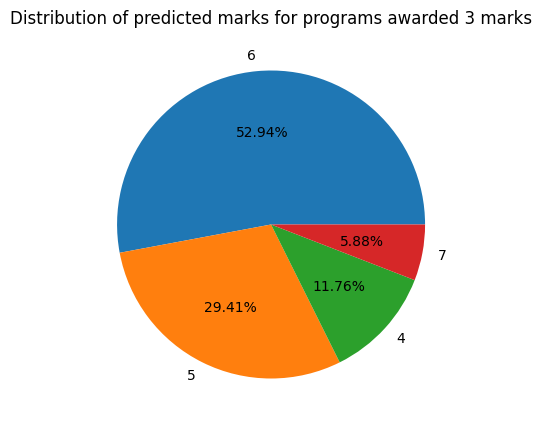

In [29]:
plt.subplots(figsize=(6,5),dpi=100)

plt.pie(sample_3.value_counts(dropna=False),labels=sample_3.value_counts(dropna=False).index,autopct='%.2f%%')
plt.title('Distribution of predicted marks for programs awarded 3 marks')
plt.show()

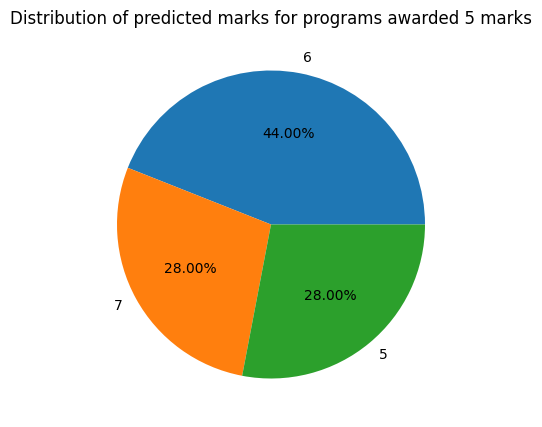

In [30]:
plt.subplots(figsize=(6,5),dpi=100)

plt.pie(sample_5.value_counts(dropna=False),labels=sample_5.value_counts(dropna=False).index,autopct='%.2f%%')
plt.title('Distribution of predicted marks for programs awarded 5 marks')
plt.show()

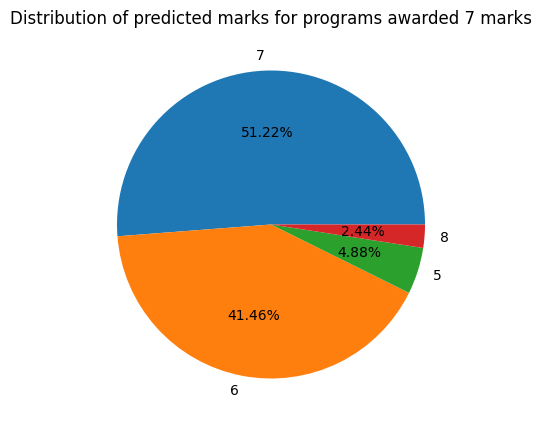

In [31]:
plt.subplots(figsize=(6,5),dpi=100)

plt.pie(sample_7.value_counts(dropna=False),labels=sample_7.value_counts(dropna=False).index,autopct='%.2f%%')
plt.title('Distribution of predicted marks for programs awarded 7 marks')
plt.show()

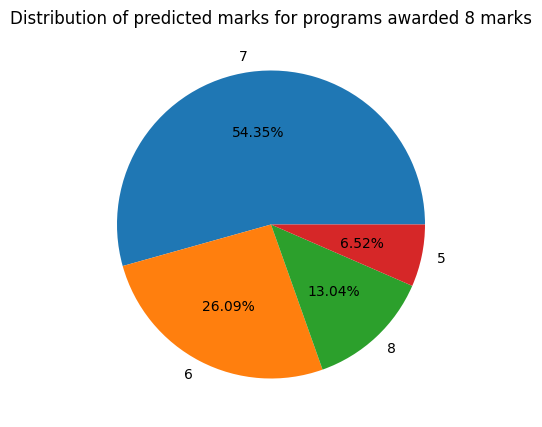

In [32]:
plt.subplots(figsize=(6,5),dpi=100)

plt.pie(sample_8.value_counts(dropna=False),labels=sample_8.value_counts(dropna=False).index,autopct='%.2f%%')
plt.title('Distribution of predicted marks for programs awarded 8 marks')
plt.show()

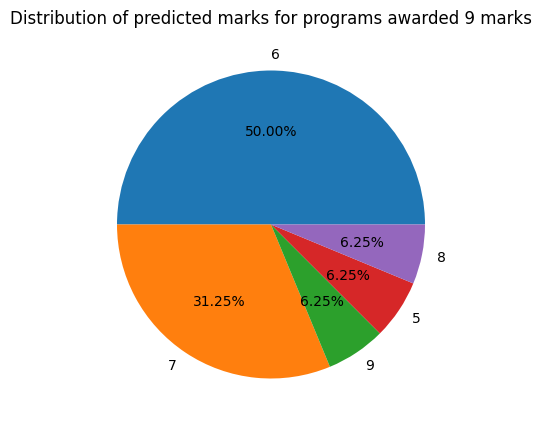

In [33]:
plt.subplots(figsize=(6,5),dpi=100)

plt.pie(sample_9.value_counts(dropna=False),labels=sample_9.value_counts(dropna=False).index,autopct='%.2f%%')
plt.title('Distribution of predicted marks for programs awarded 9 marks')
plt.show()

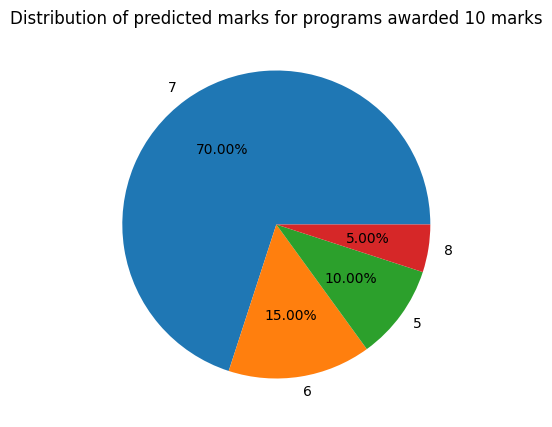

In [34]:
plt.subplots(figsize=(6,5),dpi=100)

plt.pie(sample_10.value_counts(dropna=False),labels=sample_10.value_counts(dropna=False).index,autopct='%.2f%%')
plt.title('Distribution of predicted marks for programs awarded 10 marks')
plt.show()

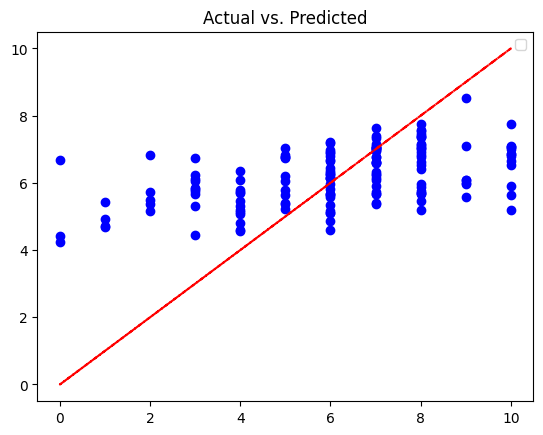

In [37]:
import matplotlib.pyplot as plt

plt.scatter(y_test[:150], y_test_pred[:150], color='blue')
plt.plot(y_test[:150], y_test[:150], color='red', linestyle='--')  # Plotting the diagonal line y = x for reference

plt.xlabel=('Actual')
plt.ylabel=('Predicted')
plt.legend()
plt.title('Actual vs. Predicted')

plt.show()